If you don't have a virtual environment setup and want to try things quickly, you might want to uncomment and run:

In [1]:
# pip install -e ../..

## Generating Environments

Print out the mouselab mdp environment registry to see if the environment we're studying is already there:

In [2]:
from mouselab.envs.registry import registry

print(registry)


name:high_increasing
branching: 3-1-2
inputs: (d, e, p, t, h)
	1, Categorical(vals=[-4 -2  2  4], probs=[0.25 0.25 0.25 0.25])
	2, Categorical(vals=[-8 -4  4  8], probs=[0.25 0.25 0.25 0.25])
	3, Categorical(vals=[-48 -24  24  48], probs=[0.25 0.25 0.25 0.25])
++++++++++++++++++++++++++++++++++
name:high_decreasing
branching: 3-1-2
inputs: (d, e, p, t, h)
	1, Categorical(vals=[-48 -24  24  48], probs=[0.25 0.25 0.25 0.25])
	2, Categorical(vals=[-8 -4  4  8], probs=[0.25 0.25 0.25 0.25])
	3, Categorical(vals=[-4 -2  2  4], probs=[0.25 0.25 0.25 0.25])
++++++++++++++++++++++++++++++++++
name:low_constant
branching: 3-1-2
inputs: (d, e, p, t, h)
	1, Categorical(vals=[-10  -5   5  10], probs=[0.25 0.25 0.25 0.25])
	2, Categorical(vals=[-10  -5   5  10], probs=[0.25 0.25 0.25 0.25])
	3, Categorical(vals=[-10  -5   5  10], probs=[0.25 0.25 0.25 0.25])
++++++++++++++++++++++++++++++++++
name:large_increasing
branching: 3-1-1-2-3
inputs: (d, e, p, t, h)
	1, Norm(0.00, 1.00)
	2, Norm(0.00, 2.0

### No matching experiment setting?

If the experiment setting you want to use is not printed out in the registry of the mouselab package, you have two options:
 
1. Add a new experiment setting to the mouselab package registry (use examples from `mouselab/envs/__init__.py`) and submit a pull request.
2. Locally define the experiment setting and add it to the registry -- we will show two examples now.

Say we want to investigate an environment with branching factor 1, 1, 1, 1, 3:
```

        depth  depth   depth   depth    depth
start     1      2       3       4        5
                                       ()
                                     /
                                    /
                                   /
 () ---- () ---- () ----() ----- () ---- ()
                                    \
                                     \
                                      \
                                       ()
 ```
 
You have two reward settings you're interested in:
 
- Increasing variance, that is the same as the `large_increasing` environment above.
- Decreasing variance, that is the opposite direction of the `large_increasing` environment above.

In [3]:
from mouselab.envs.registry import register
from mouselab.distributions import Normal
from mouselab.envs.reward_settings import large_increasing_reward

# create narrow_large_increasing
register(
    name="narrow_large_increasing",
    branching=[1,1,1,1,3],
    reward_inputs="depth",
    reward_dictionary=large_increasing_reward,
)

large_decreasing_reward = {
    level_idx + 1: Normal(0, level) for level_idx, level in enumerate([32, 8, 4, 2, 1])
}


# create narrow_large_decreasing
register(
    name="narrow_large_decreasing",
    branching=[1,1,1,1,3],
    reward_inputs="depth",
    reward_dictionary=large_decreasing_reward,
)

You can now check that your environments are on the registry:

In [4]:
print(registry)


name:high_increasing
branching: 3-1-2
inputs: (d, e, p, t, h)
	1, Categorical(vals=[-4 -2  2  4], probs=[0.25 0.25 0.25 0.25])
	2, Categorical(vals=[-8 -4  4  8], probs=[0.25 0.25 0.25 0.25])
	3, Categorical(vals=[-48 -24  24  48], probs=[0.25 0.25 0.25 0.25])
++++++++++++++++++++++++++++++++++
name:high_decreasing
branching: 3-1-2
inputs: (d, e, p, t, h)
	1, Categorical(vals=[-48 -24  24  48], probs=[0.25 0.25 0.25 0.25])
	2, Categorical(vals=[-8 -4  4  8], probs=[0.25 0.25 0.25 0.25])
	3, Categorical(vals=[-4 -2  2  4], probs=[0.25 0.25 0.25 0.25])
++++++++++++++++++++++++++++++++++
name:low_constant
branching: 3-1-2
inputs: (d, e, p, t, h)
	1, Categorical(vals=[-10  -5   5  10], probs=[0.25 0.25 0.25 0.25])
	2, Categorical(vals=[-10  -5   5  10], probs=[0.25 0.25 0.25 0.25])
	3, Categorical(vals=[-10  -5   5  10], probs=[0.25 0.25 0.25 0.25])
++++++++++++++++++++++++++++++++++
name:large_increasing
branching: 3-1-1-2-3
inputs: (d, e, p, t, h)
	1, Norm(0.00, 1.00)
	2, Norm(0.00, 2.0

You can get one environment's details using:

In [5]:
registry("narrow_large_increasing").branching, registry("narrow_large_increasing").reward_function

([1, 1, 1, 1, 3],
 <bound method Env.reward_function of 
 name:narrow_large_increasing
 branching: 1-1-1-1-3
 inputs: (d, e, p, t, h)
 	1, Norm(0.00, 1.00)
 	2, Norm(0.00, 2.00)
 	3, Norm(0.00, 4.00)
 	4, Norm(0.00, 8.00)
 	5, Norm(0.00, 32.00)
 >)

Now let's instantiate two Mouselab MDP gym environments:

In [6]:
from mouselab.mouselab import MouselabEnv
from mouselab.distributions import Categorical


env_increasing = MouselabEnv.new_symmetric_registered("narrow_large_increasing",
                                           cost=1)
env_decreasing = MouselabEnv.new_symmetric_registered("narrow_large_decreasing",
                                           cost=1)

For future steps we will keep using `env_increasing`.

Once finished you could print out the current state of the environment:

In [7]:
print(env_increasing._state)
# Output: ` (0, Norm(0.00, 1.00), Norm(0.00, 2.00), Norm(0.00, 4.00), Norm(0.00, 8.00), Norm(0.00, 32.00), Norm(0.00, 32.00), Norm(0.00, 32.00))`

(0, Norm(0.00, 1.00), Norm(0.00, 2.00), Norm(0.00, 4.00), Norm(0.00, 8.00), Norm(0.00, 32.00), Norm(0.00, 32.00), Norm(0.00, 32.00))


Now say you see what happens when you reveal the 3rd node:

In [8]:
env_increasing._step(3)
print(env_increasing._state)
# Output: ` (0, Norm(0.00, 1.00), Norm(0.00, 2.00), <number>, Norm(0.00, 8.00), Norm(0.00, 32.00), Norm(0.00, 32.00), Norm(0.00, 32.00))`

(0, Norm(0.00, 1.00), Norm(0.00, 2.00), -2.5450377391720616, Norm(0.00, 8.00), Norm(0.00, 32.00), Norm(0.00, 32.00), Norm(0.00, 32.00))


## Exact Solution

The code for the exact solution can be found in exact.py . There are some limitations on size and distributions (we only want to use categorical distributions, but there is a method to discretize implemented continuous distributions.) Since we are planning over belief states, you should only need to run it once for each reward configuration. The `timed_solve_env` function in `exact_utils.py` is probably good enough depending on what you want as output. 

If you want to try the solver out on the environment created above:

_Note: For the 3-1-2 branching environment, this will probably take around 30 minutes to two hours depending on your machine. Therefore, we use a smaller environment in this example._

Now we want to investigate an environment with branching factor 1, 1, 3:
```

        depth  depth   depth    
start     1      2       3           
                          ()
                         /
                       /
                     /
 () ---- () ---- ()  -----()
                     \
                      \
                       \
                        ()
 ```

And which shares the reward function of the `high_increasing` environment.

In [9]:
from mouselab.envs.reward_settings import high_increasing_reward

register(
    name="narrow_high_increasing",
    branching=[1,1,3],
    reward_inputs="depth",
    reward_dictionary=high_increasing_reward,
)

In [10]:
from mouselab.exact_utils import timed_solve_env


env_increasing = MouselabEnv.new_symmetric_registered("narrow_high_increasing", cost=1)

env_increasing.reset()
q, v, pi, info = timed_solve_env(env_increasing)

optimal -> 29.25 in 0.072 sec
(65536, 6) states deduplicated, reduced to (3125, 6)


The first three outputs are functions (i.e. q(s,a), v(s) and pi(s).)

#### Saving a solution

If you would like to save the Q files, you can save them as a dictionary with keys of (s,a) tuples. Set the `save_q` flag in the `solve` or `timed_solve_env` function to `True`. Please note that solving for the actual Q-values vs solving for the value of an environment can be more costly because we do not (currently) exploit the symmetry between states with a hash function.

In [11]:
env_increasing.reset()
q, v, pi, info = timed_solve_env(env_increasing, save_q = True)
q_dictionary = info["q_dictionary"]

optimal -> 29.25 in 0.052 sec
(65536, 6) states deduplicated, reduced to (3125, 6)


In [12]:
len(q_dictionary.keys())

6250

## Simulating trajectories

To construct trajectories, you need (1) a policy function (found in policies.py); (2) the inputs to that function (one of the functions from the last section); (3) an environment for the simulated agent to be acting on. For example, to simulate a trajectory with a softmax policy:

In [13]:
from mouselab.policies import SoftmaxPolicy
from mouselab.agents import Agent

agent = Agent()

pol = SoftmaxPolicy(q_dictionary)
agent.register(pol)

agent.register(env_increasing)

trace = agent.run_episode()

In [14]:
trace

{'i_episode': 0,
 'states': [(0, Cat, Cat, Cat, Cat, Cat),
  (0, Cat, Cat, Cat, Cat, -24),
  (0, Cat, Cat, -24, Cat, -24),
  (0, Cat, Cat, -24, -48, -24),
  '__term_state__'],
 'actions': [5, 3, 4, 6],
 'rewards': [-1, -1, -1, -24.0],
 'finished': True,
 'return': -27.0}

The output will be a dictionary containing information from the simulated episode, including states, actions and rewards. (Check out agents.py for more information and a function for running many episodes.)

# Rendering environment

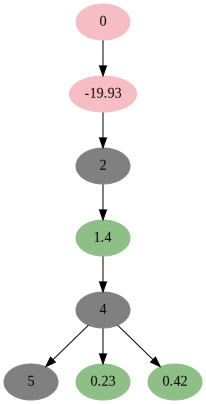

In [15]:
env_decreasing.reset()
for action in [1,3,7,6]:
    env_decreasing.step(action)
env_decreasing._render()

In [16]:
import networkx as nx
from mouselab.graph_utils import get_structure_properties



In [17]:
structure = {
            "layout": {
                "0": [0, 0],
                "1": [0, -1],
                "2": [0, -2],
                "3": [1, -2],
                "4": [-1, -2],
                "5": [1, 0],
                "6": [2, 0],
                "7": [2, -1],
                "8": [2, 1],
                "9": [-1, 0],
                "10": [-2, 0],
                "11": [-2, -1],
                "12": [-2, 1],
            },
            "initial": "0",
            "graph": {
                "0": {"up": [0, "1"], "right": [0, "5"], "left": [0, "9"]},
                "1": {"up": [0, "2"]},
                "2": {"right": [0, "3"], "left": [0, "4"]},
                "3": {},
                "4": {},
                "5": {"right": [0, "6"]},
                "6": {"up": [0, "7"], "down": [0, "8"]},
                "7": {},
                "8": {},
                "9": {"left": [0, "10"]},
                "10": {"up": [0, "11"], "down": [0, "12"]},
                "11": {},
                "12": {},
            },
        }

mdp_graph_properties = get_structure_properties(structure)

In [18]:
env = MouselabEnv.new_symmetric_registered("high_increasing", mdp_graph_properties=mdp_graph_properties)

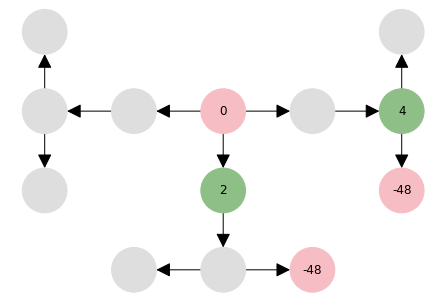

In [19]:
env.reset()
for action in [1,3,7,6]:
    env.step(action)
env._render(use_networkx=True)